In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
#!pip install annoy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.callbacks import *

np.random.seed(42)
#torch.cuda.set_device(0)

#from annoy import AnnoyIndex # spotify에서 만든 라이브러리로 유사한 벡터들을 빠르게 찾아주는 라이브러리

import glob

In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [ ]:
PATH = "/gdrive/MyDrive/의류 추천 시스템/DeepFashion/Category and Attribute Prediction Benchmark"

## Creating DF

In [ ]:
img_partitions = pd.read_csv(PATH+'/Eval/list_eval_partition.txt', delim_whitespace=True, header=1)

In [ ]:
img_partitions.head()

,image_name,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test


In [ ]:
attributes = pd.read_csv(PATH+'/Anno_coarse/list_attr_cloth.txt', sep='\s{2,}', header=0, skiprows=[0], engine='python')

In [ ]:
attributes.head()

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [ ]:
len(attributes)

1000

In [ ]:
pd.read_csv(PATH+'/Anno_coarse/list_attr_img.txt', delim_whitespace=True, header=0, skiprows=[0]).head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,image_name,attribute_labels
img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

In [ ]:
attributes_imgs = pd.read_csv(PATH+'/Anno_coarse/list_attr_img.txt', delim_whitespace=True, header=0, skiprows=[0], names=(['image_name'] + attributes['attribute_name'].tolist()))
attributes_imgs.replace([-1,0,1],[False,False,True], inplace=True)

In [ ]:
attributes_imgs.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,abstract pattern,abstract print,abstract printed,abstract stripe,acid,acid wash,americana,angeles,animal,animal print,ankle,applique,arrow collar,art,asymmetric,asymmetrical,asymmetrical hem,athletic,audrey,babe,babydoll,back bow,back cutout,back knit,back lace,back striped,backless,baja,bandage,bandana,bandana print,barbie,baroque,baroque print,baseball,basic,basquiat,batwing,beach,bead,beaded,beaded chiffon,beaded collar,beaded sheer,beaded shift,beatles,bed,bejeweled,bell,bell-sleeve,bella,belted,belted chiffon,belted floral,belted floral print,belted lace,belted maxi,belted plaid,bermuda,bib,big,bike,biker,bird,bird print,blah,bleach,bleached,bleached denim,blurred,boat neck,bodycon,bodycon midi,boho,bold,botanical,botanical print,bow,bow-back,bow-front,box,box pleat,box-pleated,boxy,boxy crop,boxy knit,boxy lace,boxy pocket,boxy striped,boyfriend,braided,breton,breton stripe,brocade,brooklyn,brooklyn nets,brushstroke,brushstroke print,burnout,bustier,butterfly,butterfly print,button,button-front,buttoned,cable,cable knit,cable-knit,caged,california,camera,cami,cami crop,cami maxi,camo,camouflage,candy,canvas,cap-sleeve,capri,cardio,cargo,cat,chambray,chambray drawstring,checked,checkered,cheetah,chenille,chevron,chevron print,chic,chiffon,chiffon floral,chiffon lace,chiffon layered,chiffon maxi,chiffon paneled,chiffon pleated,chiffon shift,chiffon shirt,chiffon surplice,chiffon-paneled,chino,chunky,chunky knit,cinched,circle,cities,city,civil,clashist,classic,classic cotton,classic crew,classic crew neck,classic denim,classic fit,classic knit,classic pocket,classic skinny,classic striped,classic v-neck,classic woven,clean,clean wash,cloud,cloud wash,coast,coated,coffee,collar,collar lace,collared,collarless,collarless faux,colorblock,colorblock pocket,colorblocked,combo,combo maxi,contrast,contrast trim,contrast-trimmed,convertible,corduroy,cotton,cotton drawstring,cotton knit,cotton-blend,cover-up,cowl,cowl neck,cozy,crepe,crepe shift,crepe woven,crew,crew neck,crinkled,crisscross,crisscross-back,crochet,crochet crop,crochet embroidered,crochet floral,crochet fringe,crochet knit,crochet lace,crochet maxi,crochet mesh,crochet overlay,crochet-paneled,crochet-trimmed,crocheted,crocheted lace,crop,cropped,cropped knit,cross-back,crossback,cuffed,cuffed denim,cuffed-sleeve,curved,curved hem,cut,cute,cutoff,cutout,cutout lace,cutout maxi,cutout sheath,cutout-back,dainty,daisy,daisy print,damask,daring,dark,darling,deep v-neck,deep-v,defyant,denim,denim drawstring,denim pencil,denim shift,denim shirt,denim skater,denim utility,desert,destroyed,devil,diamond,diamond print,dip-dye,dip-dyed,distressed,distressed low-rise,distressed mid-rise,distressed skinny,ditsy,ditsy floral,ditsy floral print,doll,dolman,dolman sleeve,dolman-sleeve,dolphin,dolphin hem,doodle,dot,dots,dotted,double-breasted,drape-front,draped,draped open-front,draped shawl,draped surplice,drapey,drawstring,dream,dreamcatcher,dreamer,drop waist,drop-sleeve,drop-waist,dropped,dye,dynamite,eagle,edge,eiffel,elasticized,elegant,elephant,elephant print,embellished,embroidered,embroidered fit,embroidered floral,embroidered gauze,embroidered gauze peasant,embroidered lace,embroidered maxi,embroidered mesh,embroidered peasant,embroidered shift,embroidered woven,embroidery,enchanted,ethereal,everyday,eyelash,eyelash knit,eyelash lace,eyelet,eyelet fit,faded,fair,fair isle,fan,fancy,faux,faux fur,faux leather,faux leather mini,faux leather moto,faux leather paneled,faux leather pencil,faux leather skater,faux leather varsity,faux leather-paneled,faux leather-trimmed,faux shearling,faux suede,faux-wrap,feather,festive,field,fisherman,fit,fit flare,fit skinny,fitted,fitted v-neck,flare,flared,flat,flat front,flat-front,flawless,flirty,floral,floral flutter,floral knit,floral lace,floral lace mini,floral l

In [ ]:
attributes_df = attributes_imgs.merge(img_partitions, how ='left', on='image_name')

In [ ]:
attributes_df.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,abstract pattern,abstract print,abstract printed,abstract stripe,acid,acid wash,americana,angeles,animal,animal print,ankle,applique,arrow collar,art,asymmetric,asymmetrical,asymmetrical hem,athletic,audrey,babe,babydoll,back bow,back cutout,back knit,back lace,back striped,backless,baja,bandage,bandana,bandana print,barbie,baroque,baroque print,baseball,basic,basquiat,batwing,beach,bead,beaded,beaded chiffon,beaded collar,beaded sheer,beaded shift,beatles,bed,bejeweled,bell,bell-sleeve,bella,belted,belted chiffon,belted floral,belted floral print,belted lace,belted maxi,belted plaid,bermuda,bib,big,bike,biker,bird,bird print,blah,bleach,bleached,bleached denim,blurred,boat neck,bodycon,bodycon midi,boho,bold,botanical,botanical print,bow,bow-back,bow-front,box,box pleat,box-pleated,boxy,boxy crop,boxy knit,boxy lace,boxy pocket,boxy striped,boyfriend,braided,breton,breton stripe,brocade,brooklyn,brooklyn nets,brushstroke,brushstroke print,burnout,bustier,butterfly,butterfly print,button,button-front,buttoned,cable,cable knit,cable-knit,caged,california,camera,cami,cami crop,cami maxi,camo,camouflage,candy,canvas,cap-sleeve,capri,cardio,cargo,cat,chambray,chambray drawstring,checked,checkered,cheetah,chenille,chevron,chevron print,chic,chiffon,chiffon floral,chiffon lace,chiffon layered,chiffon maxi,chiffon paneled,chiffon pleated,chiffon shift,chiffon shirt,chiffon surplice,chiffon-paneled,chino,chunky,chunky knit,cinched,circle,cities,city,civil,clashist,classic,classic cotton,classic crew,classic crew neck,classic denim,classic fit,classic knit,classic pocket,classic skinny,classic striped,classic v-neck,classic woven,clean,clean wash,cloud,cloud wash,coast,coated,coffee,collar,collar lace,collared,collarless,collarless faux,colorblock,colorblock pocket,colorblocked,combo,combo maxi,contrast,contrast trim,contrast-trimmed,convertible,corduroy,cotton,cotton drawstring,cotton knit,cotton-blend,cover-up,cowl,cowl neck,cozy,crepe,crepe shift,crepe woven,crew,crew neck,crinkled,crisscross,crisscross-back,crochet,crochet crop,crochet embroidered,crochet floral,crochet fringe,crochet knit,crochet lace,crochet maxi,crochet mesh,crochet overlay,crochet-paneled,crochet-trimmed,crocheted,crocheted lace,crop,cropped,cropped knit,cross-back,crossback,cuffed,cuffed denim,cuffed-sleeve,curved,curved hem,cut,cute,cutoff,cutout,cutout lace,cutout maxi,cutout sheath,cutout-back,dainty,daisy,daisy print,damask,daring,dark,darling,deep v-neck,deep-v,defyant,denim,denim drawstring,denim pencil,denim shift,denim shirt,denim skater,denim utility,desert,destroyed,devil,diamond,diamond print,dip-dye,dip-dyed,distressed,distressed low-rise,distressed mid-rise,distressed skinny,ditsy,ditsy floral,ditsy floral print,doll,dolman,dolman sleeve,dolman-sleeve,dolphin,dolphin hem,doodle,dot,dots,dotted,double-breasted,drape-front,draped,draped open-front,draped shawl,draped surplice,drapey,drawstring,dream,dreamcatcher,dreamer,drop waist,drop-sleeve,drop-waist,dropped,dye,dynamite,eagle,edge,eiffel,elasticized,elegant,elephant,elephant print,embellished,embroidered,embroidered fit,embroidered floral,embroidered gauze,embroidered gauze peasant,embroidered lace,embroidered maxi,embroidered mesh,embroidered peasant,embroidered shift,embroidered woven,embroidery,enchanted,ethereal,everyday,eyelash,eyelash knit,eyelash lace,eyelet,eyelet fit,faded,fair,fair isle,fan,fancy,faux,faux fur,faux leather,faux leather mini,faux leather moto,faux leather paneled,faux leather pencil,faux leather skater,faux leather varsity,faux leather-paneled,faux leather-trimmed,faux shearling,faux suede,faux-wrap,feather,festive,field,fisherman,fit,fit flare,fit skinny,fitted,fitted v-neck,flare,flared,flat,flat front,flat-front,flawless,flirty,floral,floral flutter,floral knit,floral lace,floral lace mini,floral l

In [ ]:
attributes_df.tail()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,abstract pattern,abstract print,abstract printed,abstract stripe,acid,acid wash,americana,angeles,animal,animal print,ankle,applique,arrow collar,art,asymmetric,asymmetrical,asymmetrical hem,athletic,audrey,babe,babydoll,back bow,back cutout,back knit,back lace,back striped,backless,baja,bandage,bandana,bandana print,barbie,baroque,baroque print,baseball,basic,basquiat,batwing,beach,bead,beaded,beaded chiffon,beaded collar,beaded sheer,beaded shift,beatles,bed,bejeweled,bell,bell-sleeve,bella,belted,belted chiffon,belted floral,belted floral print,belted lace,belted maxi,belted plaid,bermuda,bib,big,bike,biker,bird,bird print,blah,bleach,bleached,bleached denim,blurred,boat neck,bodycon,bodycon midi,boho,bold,botanical,botanical print,bow,bow-back,bow-front,box,box pleat,box-pleated,boxy,boxy crop,boxy knit,boxy lace,boxy pocket,boxy striped,boyfriend,braided,breton,breton stripe,brocade,brooklyn,brooklyn nets,brushstroke,brushstroke print,burnout,bustier,butterfly,butterfly print,button,button-front,buttoned,cable,cable knit,cable-knit,caged,california,camera,cami,cami crop,cami maxi,camo,camouflage,candy,canvas,cap-sleeve,capri,cardio,cargo,cat,chambray,chambray drawstring,checked,checkered,cheetah,chenille,chevron,chevron print,chic,chiffon,chiffon floral,chiffon lace,chiffon layered,chiffon maxi,chiffon paneled,chiffon pleated,chiffon shift,chiffon shirt,chiffon surplice,chiffon-paneled,chino,chunky,chunky knit,cinched,circle,cities,city,civil,clashist,classic,classic cotton,classic crew,classic crew neck,classic denim,classic fit,classic knit,classic pocket,classic skinny,classic striped,classic v-neck,classic woven,clean,clean wash,cloud,cloud wash,coast,coated,coffee,collar,collar lace,collared,collarless,collarless faux,colorblock,colorblock pocket,colorblocked,combo,combo maxi,contrast,contrast trim,contrast-trimmed,convertible,corduroy,cotton,cotton drawstring,cotton knit,cotton-blend,cover-up,cowl,cowl neck,cozy,crepe,crepe shift,crepe woven,crew,crew neck,crinkled,crisscross,crisscross-back,crochet,crochet crop,crochet embroidered,crochet floral,crochet fringe,crochet knit,crochet lace,crochet maxi,crochet mesh,crochet overlay,crochet-paneled,crochet-trimmed,crocheted,crocheted lace,crop,cropped,cropped knit,cross-back,crossback,cuffed,cuffed denim,cuffed-sleeve,curved,curved hem,cut,cute,cutoff,cutout,cutout lace,cutout maxi,cutout sheath,cutout-back,dainty,daisy,daisy print,damask,daring,dark,darling,deep v-neck,deep-v,defyant,denim,denim drawstring,denim pencil,denim shift,denim shirt,denim skater,denim utility,desert,destroyed,devil,diamond,diamond print,dip-dye,dip-dyed,distressed,distressed low-rise,distressed mid-rise,distressed skinny,ditsy,ditsy floral,ditsy floral print,doll,dolman,dolman sleeve,dolman-sleeve,dolphin,dolphin hem,doodle,dot,dots,dotted,double-breasted,drape-front,draped,draped open-front,draped shawl,draped surplice,drapey,drawstring,dream,dreamcatcher,dreamer,drop waist,drop-sleeve,drop-waist,dropped,dye,dynamite,eagle,edge,eiffel,elasticized,elegant,elephant,elephant print,embellished,embroidered,embroidered fit,embroidered floral,embroidered gauze,embroidered gauze peasant,embroidered lace,embroidered maxi,embroidered mesh,embroidered peasant,embroidered shift,embroidered woven,embroidery,enchanted,ethereal,everyday,eyelash,eyelash knit,eyelash lace,eyelet,eyelet fit,faded,fair,fair isle,fan,fancy,faux,faux fur,faux leather,faux leather mini,faux leather moto,faux leather paneled,faux leather pencil,faux leather skater,faux leather varsity,faux leather-paneled,faux leather-trimmed,faux shearling,faux suede,faux-wrap,feather,festive,field,fisherman,fit,fit flare,fit skinny,fitted,fitted v-neck,flare,flared,flat,flat front,flat-front,flawless,flirty,floral,floral flutter,floral knit,floral lace,floral lace mini,floral l

In [ ]:
#create list of column names to keep for training
# 1 = Texture, 2 = Fabric, 3 = Shape, 4 = Parts, 5 = Style
list_attr_names = ['image_name']+attributes[(attributes['attribute_type']==4)]['attribute_name'].tolist()
training_df = attributes_df[attributes_df['evaluation_status'].isin(['train','val'])][list_attr_names].copy()
training_df.reset_index(drop=True, inplace=True)

In [ ]:
len(list_attr_names)

217

In [ ]:
training_df.head()

,image_name,arrow collar,asymmetrical hem,back bow,back cutout,back knit,back lace,back striped,backless,batwing,beaded collar,bell,bell-sleeve,belted,belted chiffon,belted floral,belted floral print,belted lace,belted maxi,belted plaid,boat neck,bow,bow-back,bow-front,boxy pocket,braided,button,button-front,buttoned,cap-sleeve,chiffon surplice,cinched,classic crew,classic crew neck,classic pocket,classic v-neck,collar,collar lace,collared,collarless,collarless faux,colorblock pocket,contrast,contrast trim,contrast-trimmed,convertible,cowl,cowl neck,crew,crew neck,crisscross,crisscross-back,crochet fringe,crochet-trimmed,cross-back,crossback,cuffed,cuffed-sleeve,curved,curved hem,cutout-back,deep v-neck,deep-v,dolman,dolman sleeve,dolman-sleeve,dolphin,dolphin hem,double-breasted,drape-front,draped,draped open-front,draped shawl,draped surplice,drawstring,drop waist,drop-sleeve,drop-waist,dropped,elephant,elephant print,faux leather-trimmed,fitted v-neck,flat,flat front,flat-front,floral print strapless,floral print surplice,floral surplice,flounce,flounced,fluted,flutter,flutter sleeve,flutter-sleeve,fringe,fringed,gathered waistline,graphic racerback,heathered v-neck,hem,high-neck,high-slit,high-slit maxi,high-waist,high-waisted,hood,hooded,hooded maxi,hooded utility,illusion,illusion neckline,kangaroo,kangaroo pocket,keyhole,knit open,knit pocket,knit raglan,knit shawl,knit v-neck,knotted,lace peplum,lace sleeve,lace trim,lace-trim,lace-trimmed,lace-up,ladder-back,lapel,leather peplum,leather trimmed,leather-trimmed,long sleeve,long-sleeve,long-sleeved,m-slit,m-slit maxi,mesh racerback,mesh-trimmed,mock,mock neck,mock-neck,neck ribbed,neck skater,neck striped,neckline,notched collar,off-the-shoulder,one-button,one-shoulder,open-back,open-front,open-knit,open-shoulder,peplum,pin,pocket,print racerback,print strapless,print strappy,print surplice,print v-neck,racerback,raglan,raglan sleeve,ruffle trim,scallop,scalloped,scoop,scoop-neck,self-tie,shawl,shoulder,side slit,side-slit,single-button,sleeve,sleeveless,slit,split,split-back,split-neck,strap,strapless,strapless tribal,strappy,striped v-neck,surplice,suspender,t-back,tassel,tasseled,tie-back,tie-front,tie-neck,toggle,topstitched,trim,trimmed,tulip-back,turtle-neck,twist-front,twisted,two-button,v-back,v-cut,v-neck,vent,vented hem,y-back,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [ ]:
training_df.shape

(249222, 217)

In [ ]:
training_df.iloc[2][1:].max()

True

In [ ]:
#removing images from DF with no label
# True 없는거 삭제
training_df['max'] = [training_df.iloc[x][1:].max() for x in training_df.index.tolist()]
training_df = training_df[training_df['max'].isin([True])].copy()
training_df.drop('max', axis=1, inplace=True)

In [ ]:
training_df.shape

(98054, 217)

In [ ]:
def count_attr_imgs(attr_df):
    col_counts = {}

    for col in attr_df.columns[1:]:
        col_counts[col] = attr_df[col].value_counts().to_frame().loc[True][0] # column별 True 개수
    
    col_df = pd.DataFrame.from_dict(col_counts, orient='index', columns=['Count'])
    
    return col_df

#.sort_values(by='Count')

## Baseline Model (No Data Cleaning)

In [ ]:
count_attr_imgs(training_df).head()

,Count
arrow collar,148
asymmetrical hem,169
back bow,48
back cutout,139
back knit,61


In [ ]:
count_attr_imgs(training_df).sort_values(by='Count',ascending=False).head()

,Count
sleeve,15437
sleeveless,6869
long sleeve,5809
collar,4720
v-neck,4688


In [ ]:
len(training_df.columns)

217

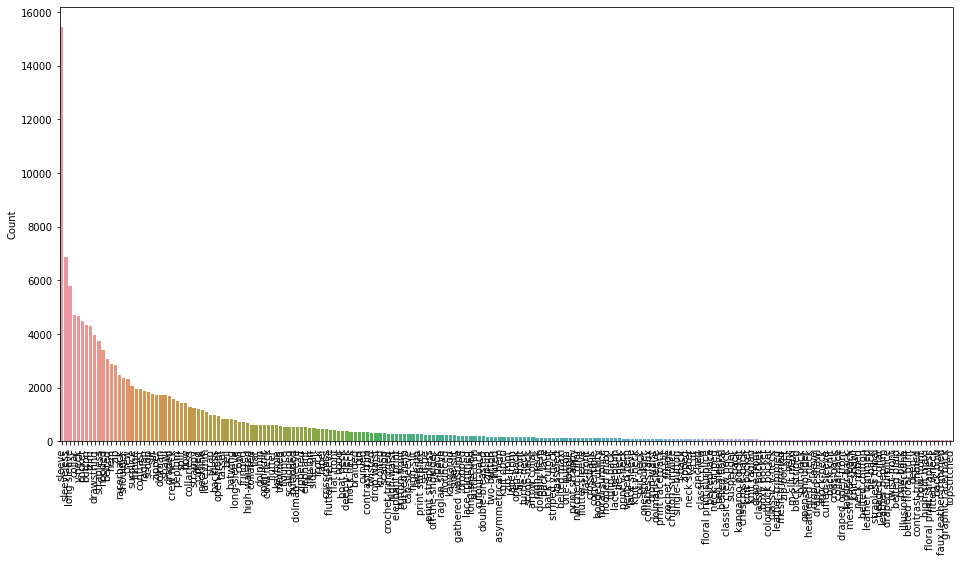

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=count_attr_imgs(training_df).sort_values(by='Count',ascending=False).index,y=count_attr_imgs(training_df).sort_values(by='Count',ascending=False)['Count'])
plt.xticks(rotation=90);

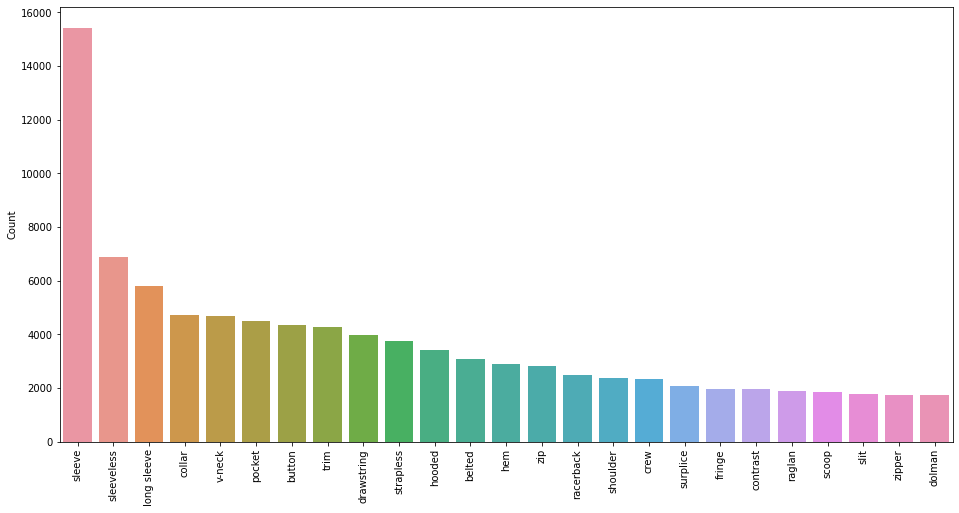

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=count_attr_imgs(training_df).sort_values(by='Count',ascending=False)[:25].index,y=count_attr_imgs(training_df).sort_values(by='Count',ascending=False)[:25]['Count'])
plt.xticks(rotation=90);

In [ ]:
# 피처 100개만
drop_feature = count_attr_imgs(training_df).sort_values(by='Count',ascending=True).index[:117].tolist()
len(drop_feature)

117

In [ ]:
count_attr_imgs(training_df).sort_values(by='Count',ascending=True).index[:117]

Index(['topstitched', 'graphic racerback', 'faux leather-trimmed',
       'floral print strapless', 'fitted v-neck', 'high-slit maxi', 'back bow',
       'bow-front', 'contrast-trimmed', 'belted floral print',
       ...
       'zip-front', 'knit open', 'fluted', 'asymmetrical hem', 'two-button',
       'zip-up', 'double-breasted', 'cutout-back', 'ruffle trim',
       'lace-trimmed'],
      dtype='object', length=117)

In [ ]:
training_df100 = training_df.drop(drop_feature, axis=1)
training_df100.reset_index(inplace=True, drop=True)
training_df100.head()

,image_name,backless,batwing,bell,belted,boat neck,bow,braided,button,button-front,buttoned,cap-sleeve,collar,collared,collarless,contrast,contrast trim,cowl,cowl neck,crew,crew neck,crisscross,crochet-trimmed,cuffed,curved,curved hem,deep v-neck,dolman,dolman sleeve,dolphin,draped,drawstring,drop waist,dropped,elephant,elephant print,flat,flat front,flounce,flounced,flutter,flutter sleeve,fringe,fringed,gathered waistline,hem,high-slit,high-waist,high-waisted,hood,hooded,illusion,kangaroo,keyhole,knotted,lace trim,lace-up,lapel,long sleeve,long-sleeve,long-sleeved,mock,mock neck,neckline,off-the-shoulder,open-front,open-knit,peplum,pin,pocket,print strapless,print surplice,racerback,raglan,raglan sleeve,scallop,scalloped,scoop,self-tie,shawl,shoulder,side slit,side-slit,sleeve,sleeveless,slit,split,strap,strapless,strappy,surplice,tassel,trim,trimmed,twisted,v-back,v-neck,zip,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,img/Sheer_Pleated-Front_Blouse/img_00000015.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,img/Sheer_Pleated-Front_Blouse/img_00000017.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,img/Sheer_Pleated-Front_Blouse/img_00000022.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
training_df100.shape

(98054, 100)

In [ ]:
training_df100['max'] = [training_df100.iloc[x][1:].max() for x in training_df100.index.tolist()]
training_df100 = training_df100[training_df100['max'].isin([True])].copy()
training_df100.drop('max', axis=1, inplace=True)

In [ ]:
training_df100.shape

(93814, 100)

In [ ]:
training_df100.to_csv('tdf_part100.csv')

In [ ]:
count_attr_imgs(training_df100).sum()

Count    136824
dtype: int64

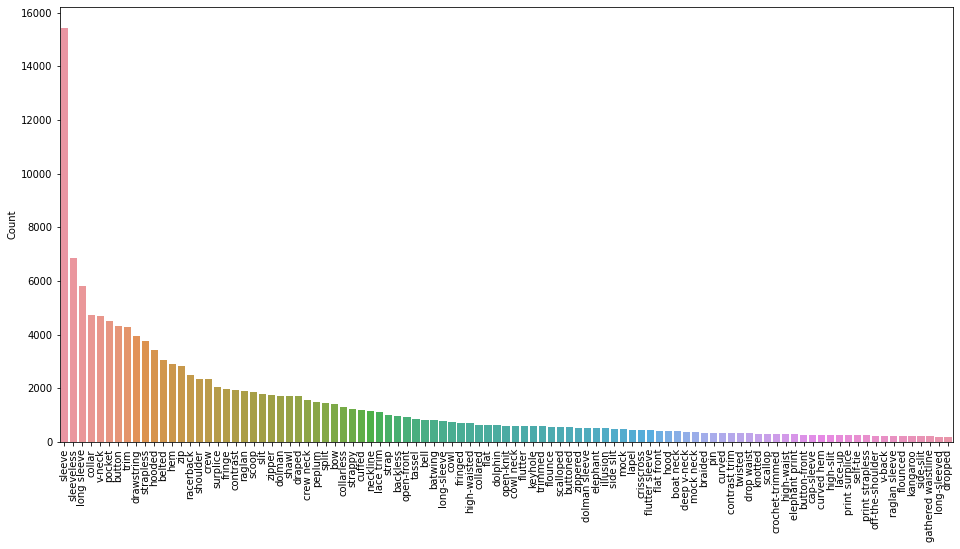

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=count_attr_imgs(training_df100).sort_values(by='Count',ascending=False).index,y=count_attr_imgs(training_df100).sort_values(by='Count',ascending=False)['Count'])
plt.xticks(rotation=90);

## Modeling

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
np.random.seed(42)

In [ ]:
training_df100.head()

,image_name,backless,batwing,bell,belted,boat neck,bow,braided,button,button-front,buttoned,cap-sleeve,collar,collared,collarless,contrast,contrast trim,cowl,cowl neck,crew,crew neck,crisscross,crochet-trimmed,cuffed,curved,curved hem,deep v-neck,dolman,dolman sleeve,dolphin,draped,drawstring,drop waist,dropped,elephant,elephant print,flat,flat front,flounce,flounced,flutter,flutter sleeve,fringe,fringed,gathered waistline,hem,high-slit,high-waist,high-waisted,hood,hooded,illusion,kangaroo,keyhole,knotted,lace trim,lace-up,lapel,long sleeve,long-sleeve,long-sleeved,mock,mock neck,neckline,off-the-shoulder,open-front,open-knit,peplum,pin,pocket,print strapless,print surplice,racerback,raglan,raglan sleeve,scallop,scalloped,scoop,self-tie,shawl,shoulder,side slit,side-slit,sleeve,sleeveless,slit,split,strap,strapless,strappy,surplice,tassel,trim,trimmed,twisted,v-back,v-neck,zip,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,img/Sheer_Pleated-Front_Blouse/img_00000015.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,img/Sheer_Pleated-Front_Blouse/img_00000022.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,img/Sheer_Pleated-Front_Blouse/img_00000023.jpg,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [ ]:
label_column_names = training_df100.columns.tolist()[1:]

In [ ]:
# train과 validation 함께 묶는 것
img_base_path = Path("/gdrive/MyDrive/의류 추천 시스템/AI/")
data = ImageDataBunch.from_df(img_base_path, training_df100, ds_tfms=get_transforms(), size=150, label_col = label_column_names)
data.normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


ImageDataBunch;

Train: LabelList (75052 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: MultiCategoryList
sleeveless;v-neck,hem,contrast;lapel;long-sleeved,high-waist,collar;deep v-neck;v-neck
Path: /gdrive/MyDrive/의류 추천 시스템/AI;

Valid: LabelList (18762 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: MultiCategoryList
racerback,sleeveless,shoulder,belted,print surplice;surplice
Path: /gdrive/MyDrive/의류 추천 시스템/AI;

Test: None

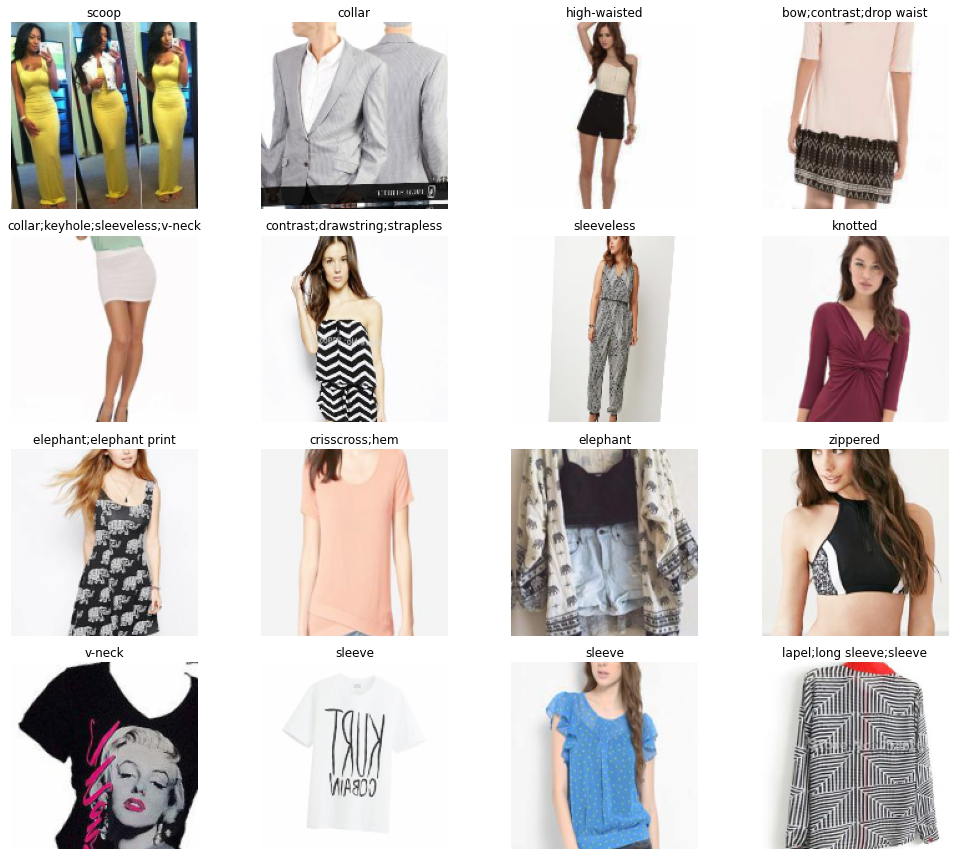

In [ ]:
data.show_batch(rows=4, figsize=(14, 12))

In [ ]:
print(data.classes)
len(data.classes), data.c
# data.c : 출력에 포함될 클래스 수 = len(data.classes)

['backless', 'batwing', 'bell', 'belted', 'boat neck', 'bow', 'braided', 'button', 'button-front', 'buttoned', 'cap-sleeve', 'collar', 'collared', 'collarless', 'contrast', 'contrast trim', 'cowl', 'cowl neck', 'crew', 'crew neck', 'crisscross', 'crochet-trimmed', 'cuffed', 'curved', 'curved hem', 'deep v-neck', 'dolman', 'dolman sleeve', 'dolphin', 'draped', 'drawstring', 'drop waist', 'dropped', 'elephant', 'elephant print', 'flat', 'flat front', 'flounce', 'flounced', 'flutter', 'flutter sleeve', 'fringe', 'fringed', 'gathered waistline', 'hem', 'high-slit', 'high-waist', 'high-waisted', 'hood', 'hooded', 'illusion', 'kangaroo', 'keyhole', 'knotted', 'lace trim', 'lace-up', 'lapel', 'long sleeve', 'long-sleeve', 'long-sleeved', 'mock', 'mock neck', 'neckline', 'off-the-shoulder', 'open-front', 'open-knit', 'peplum', 'pin', 'pocket', 'print strapless', 'print surplice', 'racerback', 'raglan', 'raglan sleeve', 'scallop', 'scalloped', 'scoop', 'self-tie', 'shawl', 'shoulder', 'side sli

(99, 99)

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.1) # 정확도 임계값=0.1, 임계값 초과하는 데이터 선택해 실제와 비교
f_score = partial(fbeta, thresh=0.1)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[acc_02, f_score], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
import warnings; warnings.filterwarnings('ignore')

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.069147,0.064278,0.972190,0.207697,56:30
1,0.059772,0.057376,0.970756,0.291335,59:48
2,0.057339,0.055092,0.970264,0.328161,55:05
3,0.056013,0.053936,0.970401,0.342564,56:41
4,0.055290,0.053730,0.971018,0.345057,58:13


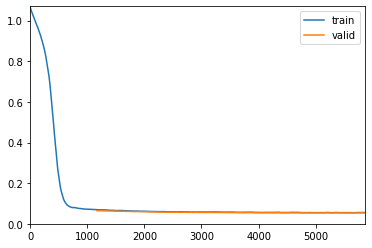

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
learn.lr_find() # 적절한 learning rate 찾기

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


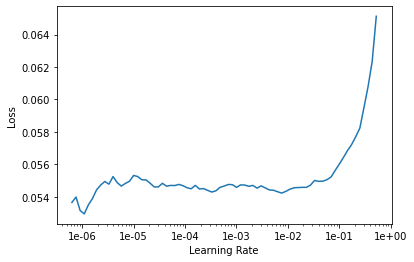

In [ ]:
learn.recorder.plot() # 가장 가파른 경사 부분4

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.059943,0.059013,0.970195,0.299096,1:00:59
1,0.057482,0.054650,0.968628,0.353164,57:20
2,0.053364,0.051267,0.971017,0.397088,59:29
3,0.050969,0.050109,0.972869,0.409079,56:56


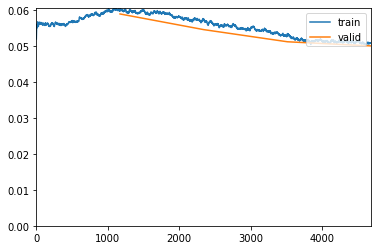

In [ ]:
learn.fit_one_cycle(4, slice(1e-4, 1e-2))

In [ ]:
learn.save('parts-resnet50-size150-fr5-unfr4-100', return_path=True)
learn.export('parts-resnet50-size150-fr5-unfr4-100.pkl')

[('sleeve', 0.46041983366012573), ('flutter', 0.14119206368923187), ('flutter sleeve', 0.14098261296749115), ('surplice', 0.07492587715387344), ('belted', 0.0710892379283905)]


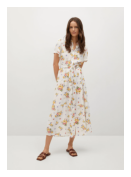

In [ ]:
predict_img_path = "/gdrive/MyDrive/의류 추천 시스템/AI/test/floral_dress.jpg" 
category,classIndex,losses = learn.predict(open_image(predict_img_path))
predictions = sorted(zip(data.classes, map(float, losses)), key=lambda p: p[1], reverse=True)
print (predictions[:5])
show_image(open_image(predict_img_path))

# "/data/Michael/data/predict/2.png"

## Test

In [ ]:
test_df = attributes_df[attributes_df['evaluation_status'].isin(['test'])][list_attr_names].copy()
test_df.reset_index(drop=True, inplace=True)

In [ ]:
# label 없는거(다 False인거) 삭제
test_df['max'] = [test_df.iloc[x][1:].max() for x in test_df.index.tolist()]
test_df = test_df[test_df['max'].isin([True])].copy()
test_df.drop('max', axis=1, inplace=True)

In [ ]:
test_df.shape

(15738, 217)

In [ ]:
test_df

,image_name,arrow collar,asymmetrical hem,back bow,back cutout,back knit,back lace,back striped,backless,batwing,beaded collar,bell,bell-sleeve,belted,belted chiffon,belted floral,belted floral print,belted lace,belted maxi,belted plaid,boat neck,bow,bow-back,bow-front,boxy pocket,braided,button,button-front,buttoned,cap-sleeve,chiffon surplice,cinched,classic crew,classic crew neck,classic pocket,classic v-neck,collar,collar lace,collared,collarless,collarless faux,colorblock pocket,contrast,contrast trim,contrast-trimmed,convertible,cowl,cowl neck,crew,crew neck,crisscross,crisscross-back,crochet fringe,crochet-trimmed,cross-back,crossback,cuffed,cuffed-sleeve,curved,curved hem,cutout-back,deep v-neck,deep-v,dolman,dolman sleeve,dolman-sleeve,dolphin,dolphin hem,double-breasted,drape-front,draped,draped open-front,draped shawl,draped surplice,drawstring,drop waist,drop-sleeve,drop-waist,dropped,elephant,elephant print,faux leather-trimmed,fitted v-neck,flat,flat front,flat-front,floral print strapless,floral print surplice,floral surplice,flounce,flounced,fluted,flutter,flutter sleeve,flutter-sleeve,fringe,fringed,gathered waistline,graphic racerback,heathered v-neck,hem,high-neck,high-slit,high-slit maxi,high-waist,high-waisted,hood,hooded,hooded maxi,hooded utility,illusion,illusion neckline,kangaroo,kangaroo pocket,keyhole,knit open,knit pocket,knit raglan,knit shawl,knit v-neck,knotted,lace peplum,lace sleeve,lace trim,lace-trim,lace-trimmed,lace-up,ladder-back,lapel,leather peplum,leather trimmed,leather-trimmed,long sleeve,long-sleeve,long-sleeved,m-slit,m-slit maxi,mesh racerback,mesh-trimmed,mock,mock neck,mock-neck,neck ribbed,neck skater,neck striped,neckline,notched collar,off-the-shoulder,one-button,one-shoulder,open-back,open-front,open-knit,open-shoulder,peplum,pin,pocket,print racerback,print strapless,print strappy,print surplice,print v-neck,racerback,raglan,raglan sleeve,ruffle trim,scallop,scalloped,scoop,scoop-neck,self-tie,shawl,shoulder,side slit,side-slit,single-button,sleeve,sleeveless,slit,split,split-back,split-neck,strap,strapless,strapless tribal,strappy,striped v-neck,surplice,suspender,t-back,tassel,tasseled,tie-back,tie-front,tie-neck,toggle,topstitched,trim,trimmed,tulip-back,turtle-neck,twist-front,twisted,two-button,v-back,v-cut,v-neck,vent,vented hem,y-back,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
3,img/Sheer_Pleated-Front_Blouse/img_00000019.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,img/Sheer_Pleated-Front_Blouse/img_00000053.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
# 피처 99개만
drop_feature = count_attr_imgs(training_df).sort_values(by='Count',ascending=True).index[:117].tolist()
len(drop_feature)

117

In [ ]:
test_df100 = test_df.drop(drop_feature, axis=1)
test_df100.reset_index(inplace=True, drop=True)
test_df100['max'] = [test_df100.iloc[x][1:].max() for x in test_df100.index.tolist()]
test_df100 = test_df100[test_df100['max'].isin([True])].copy()
test_df100.drop('max', axis=1, inplace=True)
test_df100.head()

,image_name,backless,batwing,bell,belted,boat neck,bow,braided,button,button-front,buttoned,cap-sleeve,collar,collared,collarless,contrast,contrast trim,cowl,cowl neck,crew,crew neck,crisscross,crochet-trimmed,cuffed,curved,curved hem,deep v-neck,dolman,dolman sleeve,dolphin,draped,drawstring,drop waist,dropped,elephant,elephant print,flat,flat front,flounce,flounced,flutter,flutter sleeve,fringe,fringed,gathered waistline,hem,high-slit,high-waist,high-waisted,hood,hooded,illusion,kangaroo,keyhole,knotted,lace trim,lace-up,lapel,long sleeve,long-sleeve,long-sleeved,mock,mock neck,neckline,off-the-shoulder,open-front,open-knit,peplum,pin,pocket,print strapless,print surplice,racerback,raglan,raglan sleeve,scallop,scalloped,scoop,self-tie,shawl,shoulder,side slit,side-slit,sleeve,sleeveless,slit,split,strap,strapless,strappy,surplice,tassel,trim,trimmed,twisted,v-back,v-neck,zip,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000019.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,img/Sheer_Pleated-Front_Blouse/img_00000053.jpg,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,img/Sheer_Pleated-Front_Blouse/img_00000054.jpg,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,img/Sheer_Pleated-Front_Blouse/img_00000058.jpg,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,img/Sheer_Pleated-Front_Blouse/img_00000073.jpg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [ ]:
test_df100.shape

(15083, 100)

In [ ]:
test_df100['image_name'][23]

'img/Shirred_Floral-Embroidered_Blouse/img_00000093.jpg'

In [ ]:
PATH = '/gdrive/MyDrive/의류 추천 시스템/AI/'

In [ ]:
learn = load_learner('/gdrive/MyDrive/의류 추천 시스템/AI/','parts-resnet50-size150-fr5-unfr4-100.pkl')

In [ ]:
test_df100.loc[3,test_df100.loc[3]==True].index

Index(['button'], dtype='object')

[('sleeveless', 0.2952197790145874), ('pocket', 0.24535804986953735), ('button', 0.06905800849199295), ('contrast', 0.047468241304159164), ('trim', 0.046460699290037155)]


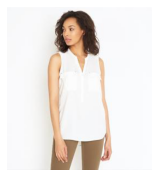

In [ ]:
predict_img_path = PATH + test_df100['image_name'][122]
category,classIndex,losses = learn.predict(open_image(predict_img_path))
predictions = sorted(zip(list(test_df100.columns[1:]), map(float, losses)), key=lambda p: p[1], reverse=True)
print (predictions[:5])
show_image(open_image(predict_img_path))